In [1]:
%load_ext autoreload
%autoreload 2

# imports

In [2]:
from tools import P_forest_small, R_forest_small, P_forest_large, R_forest_large, \
                P_lake_small, R_lake_small, lake_small, \
                P_lake_large, R_lake_large, lake_large, \
                eval_policy_forest, eval_policy_lake, \
                tune_hyper, plot_hyper_curve, convergence_plot, visualize_lake, \
                visualize_forest, time_effect_plot
from hiive.mdptoolbox.mdp import PolicyIteration 
import time
import pickle

# forest

## small

### tune hyper

best params are {'gamma': 0.5, 'max_iter': 100}


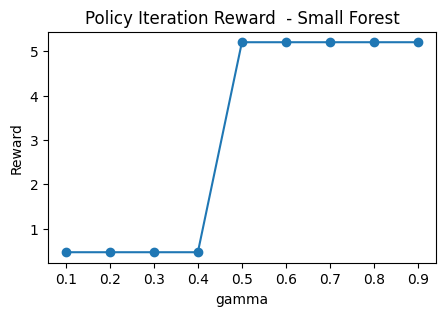

In [3]:
param_grid = {
    'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'max_iter': [100]
}
problem = 'forest'
best_params_forest_small, result_forest_small = tune_hyper(param_grid, PolicyIteration, P_forest_small, R_forest_small, problem=problem, 
                         episode=1000, max_step=40, verbose=False)
print(f'best params are {best_params_forest_small}')
model_type = 'Policy Iteration'
data_name = 'Small Forest'
hyper = 'gamma'
plot_hyper_curve(hyper, params=best_params_forest_small, result=result_forest_small, model_type=model_type, data_name=data_name)

In [4]:
result_forest_small

,gamma,max_iter,reward,policy,iteration
0,0.1,100,0.4666,"(0, 1, 1, 1, 0)",1
1,0.2,100,0.4666,"(0, 1, 1, 0, 0)",2
2,0.3,100,0.4666,"(0, 1, 1, 0, 0)",2
3,0.4,100,0.4666,"(0, 1, 0, 0, 0)",3
4,0.5,100,5.2020,"(0, 0, 0, 0, 0)",4
5,0.6,100,5.2020,"(0, 0, 0, 0, 0)",4
6,0.7,100,5.2020,"(0, 0, 0, 0, 0)",4
7,0.8,100,5.2020,"(0, 0, 0, 0, 0)",4
8,0.9,100,5.2020,"(0, 0, 0, 0, 0)",4


### convergence plot

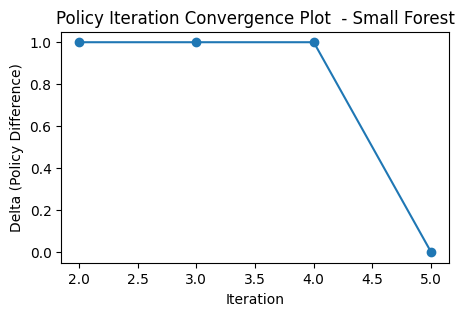

[(1, array([0, 1, 1, 1, 0])),
 (2, array([0, 1, 1, 0, 0])),
 (3, array([0, 1, 0, 0, 0])),
 (4, array([0, 0, 0, 0, 0]))]

In [5]:
pi_forest_small = PolicyIteration(P_forest_small, R_forest_small, **best_params_forest_small)
t_start = time.time()
history_forest_small = pi_forest_small.run()
t_pi_forest_small = time.time() - t_start
convergence_plot('Policy Iteration', 'Small Forest', alg=pi_forest_small)
pi_forest_small.p_cumulative

### reward

In [6]:
eval_policy_forest(P_forest_small, R_forest_small, pi_forest_small.policy, 
                   episode=1000, max_step=40, start_s=0, verbose=False)

5.202

### visualization

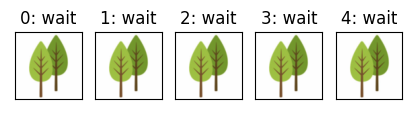

In [7]:
policy = pi_forest_small.p_cumulative[-1][1]
visualize_forest(policy)

## large

### tune hyper

best params are {'gamma': 0.99, 'max_iter': 100}


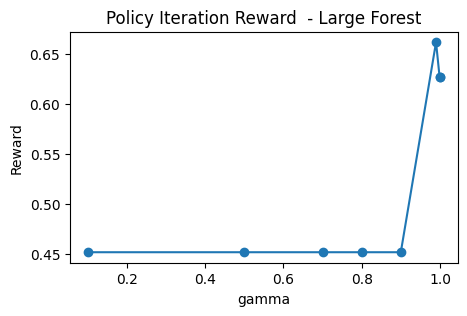

In [8]:
param_grid = {
    'gamma': [0.1, 0.5, 0.7, 0.8, 0.9, 0.99, 0.999, 0.9999],
    'max_iter': [100]
}
problem = 'forest'
best_params_forest_large, result_forest_large = tune_hyper(param_grid, PolicyIteration, P_forest_large, R_forest_large, problem=problem, 
                         episode=1000, max_step=40, verbose=False)
print(f'best params are {best_params_forest_large}')
model_type = 'Policy Iteration'
data_name = 'Large Forest'
hyper = 'gamma'
plot_hyper_curve(hyper, params=best_params_forest_large, result=result_forest_large, model_type=model_type, data_name=data_name)

In [9]:
result_forest_large

,gamma,max_iter,reward,policy,iteration
0,0.1000,100,0.451850,"(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
1,0.5000,100,0.451850,"(0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2
2,0.7000,100,0.451850,"(0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",2
3,0.8000,100,0.451850,"(0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...",3
4,0.9000,100,0.451850,"(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...",5
5,0.9900,100,0.661375,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",7
6,0.9990,100,0.627000,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6
7,0.9999,100,0.627000,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6


### convergence plot

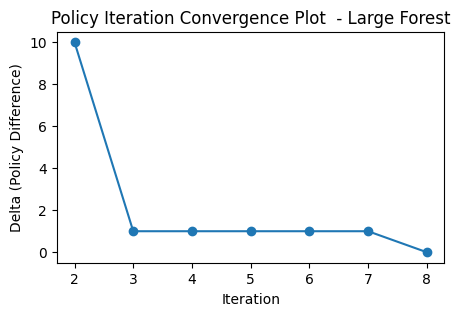

[(1, array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])),
 (2, array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])),
 (3, array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])),
 (4, array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])),
 (5, array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])),
 (6, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])),
 (7, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]))]

In [10]:
pi_forest_large = PolicyIteration(P_forest_large, R_forest_large, **best_params_forest_large)
# pi_forest_large = PolicyIteration(P_forest_large, R_forest_large, gamma=0.9, max_iter=100)
t_start = time.time()
history_forest_large = pi_forest_large.run()
t_pi_forest_large = time.time() - t_start
convergence_plot('Policy Iteration', 'Large Forest', alg=pi_forest_large)
pi_forest_large.p_cumulative

### reward

In [11]:
eval_policy_forest(P_forest_large, R_forest_large, pi_forest_large.policy, 
                   episode=1000, max_step=40, start_s=0, verbose=False)

0.661375

### visualization

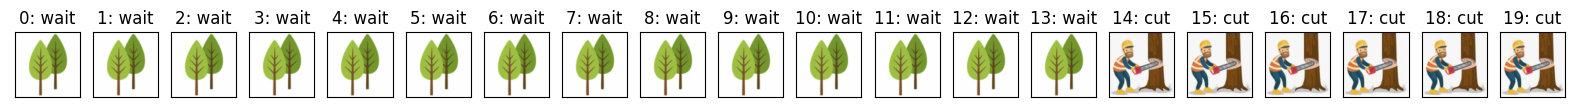

In [12]:
policy = pi_forest_large.p_cumulative[-1][1]
visualize_forest(policy)

## comparison

In [13]:
with open('./pi_forest_result.p', 'wb') as f:
    pickle.dump((pi_forest_small.iter, pi_forest_large.iter, t_pi_forest_small, t_pi_forest_large),
               f)
with open('./policy_pi_forest_small.p', 'wb') as f:
    pickle.dump(pi_forest_small.policy, f)
with open('./policy_pi_forest_large.p', 'wb') as f:
    pickle.dump(pi_forest_large.policy, f)

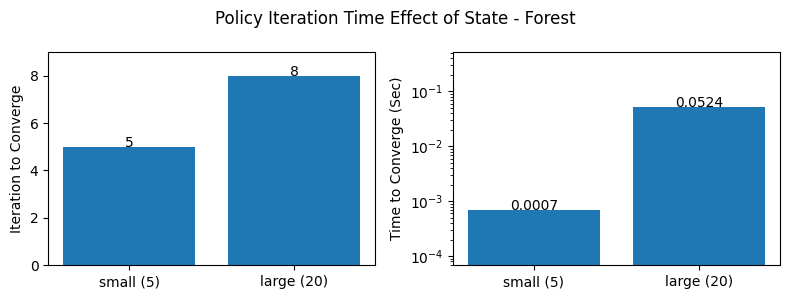

In [14]:
time_effect_plot(pi_forest_small, pi_forest_large, t_pi_forest_small, t_pi_forest_large, 
                 'Forest', 'Policy Iteration')

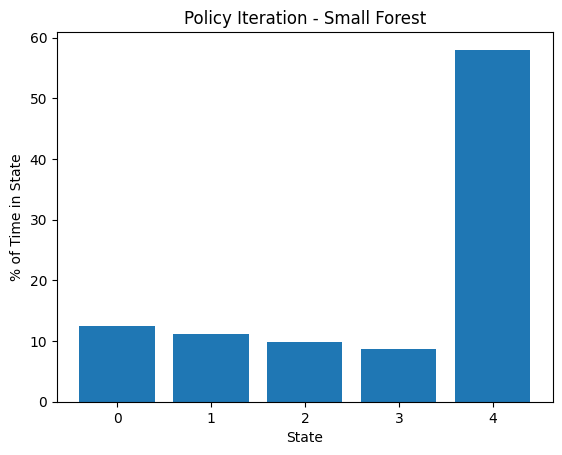

5.202

In [15]:
eval_policy_forest(P_forest_small, R_forest_small, pi_forest_small.policy, 
                   episode=1000, max_step=40, start_s=0, verbose=False, 
                   plot_state_cnt=True, model='Policy Iteration', problem='Small Forest')

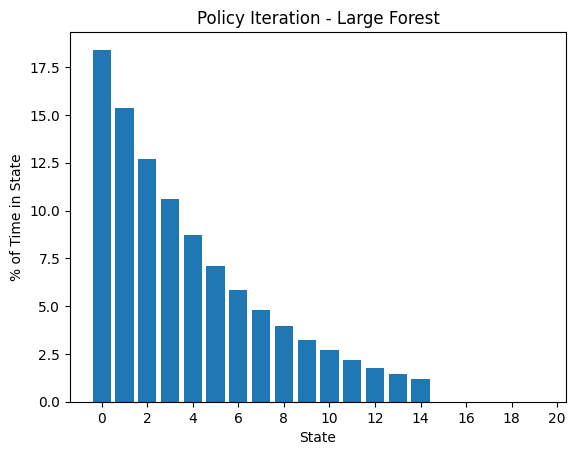

0.661375

In [16]:
eval_policy_forest(P_forest_large, R_forest_large, pi_forest_large.policy, 
                   episode=1000, max_step=40, start_s=0, verbose=False, 
                   plot_state_cnt=True, model='Policy Iteration', problem='Large Forest',
                   xticks=range(0,21,2))

# lake

## small

In [17]:
pi_lake_small = PolicyIteration(P_lake_small, R_lake_small, gamma=0.999, max_iter=100)
history_lake_small = pi_lake_small.run()

In [18]:
eval_policy_lake(lake_small, pi_lake_small.policy, episode=10, max_step=1000, verbose=True)

Finish with 64 steps: reward=1.0
Finish with 17 steps: reward=1.0
Finish with 46 steps: reward=1.0
Finish with 46 steps: reward=1.0
Finish with 20 steps: reward=1.0
Finish with 22 steps: reward=1.0
Finish with 33 steps: reward=1.0
Finish with 66 steps: reward=1.0
Finish with 10 steps: reward=1.0
Finish with 18 steps: reward=1.0
Finish with average steps of 34.2


1.0

In [19]:
eval_policy_lake(lake_small, pi_lake_small.policy, episode=10, max_step=1000, verbose=True)

Finish with 64 steps: reward=1.0
Finish with 17 steps: reward=1.0
Finish with 46 steps: reward=1.0
Finish with 46 steps: reward=1.0
Finish with 20 steps: reward=1.0
Finish with 22 steps: reward=1.0
Finish with 33 steps: reward=1.0
Finish with 66 steps: reward=1.0
Finish with 10 steps: reward=1.0
Finish with 18 steps: reward=1.0
Finish with average steps of 34.2


1.0

In [20]:
pi_lake_small.policy

(1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)

### tune hyper

best params are {'gamma': 0.001, 'max_iter': 100}


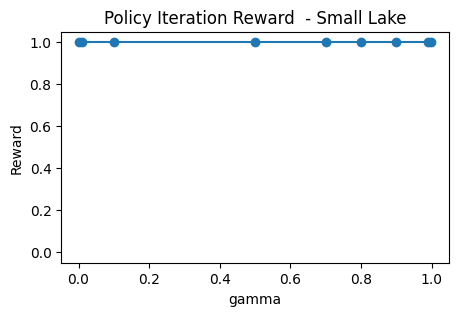

CPU times: user 1.79 s, sys: 20.9 ms, total: 1.81 s
Wall time: 1.48 s


In [21]:
%%time
param_grid = {
    'gamma': [0.001, 0.01, 0.1, 0.5, 0.7, 0.8, 0.9, 0.99, 0.999],
    'max_iter': [100],
}
problem = 'lake'
best_params_lake_small, result_lake_small = tune_hyper(param_grid, PolicyIteration, 
                        P_lake_small, R_lake_small, env=lake_small, problem=problem, 
                         episode=1000, max_step=200, verbose=False)
print(f'best params are {best_params_lake_small}')
model_type = 'Policy Iteration'
data_name = 'Small Lake'
hyper = 'gamma'
plot_hyper_curve(hyper, params=best_params_lake_small, result=result_lake_small, 
                 model_type=model_type, data_name=data_name, ylim=(-0.05, 1.05))

In [22]:
result_lake_small

,gamma,max_iter,reward,policy,iteration
0,0.001,100,1.0,"(1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)",6
1,0.010,100,1.0,"(1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)",6
2,0.100,100,1.0,"(1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)",6
3,0.500,100,1.0,"(1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)",6
4,0.700,100,1.0,"(1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)",6
5,0.800,100,1.0,"(1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)",6
6,0.900,100,1.0,"(1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)",6
7,0.990,100,1.0,"(1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)",7
8,0.999,100,1.0,"(1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0)",7


### convergence plot

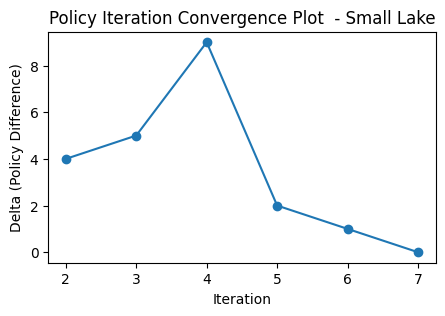

[(1, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])),
 (2, array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0])),
 (3, array([0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0])),
 (4, array([1, 2, 0, 0, 1, 2, 1, 1, 1, 2, 3, 2, 1, 0, 0, 0])),
 (5, array([1, 2, 0, 0, 1, 2, 1, 1, 3, 2, 3, 2, 2, 0, 0, 0])),
 (6, array([1, 2, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0]))]

In [23]:
pi_lake_small = PolicyIteration(P_lake_small, R_lake_small, **best_params_lake_small)
t_start = time.time()
history_lake_small = pi_lake_small.run()
t_pi_lake_small = time.time() - t_start
convergence_plot('Policy Iteration', 'Small Lake', alg=pi_lake_small)
pi_lake_small.p_cumulative

### reward

In [24]:
eval_policy_lake(lake_small, pi_lake_small.policy, episode=1000, max_step=200, verbose=False)

1.0

### visualization

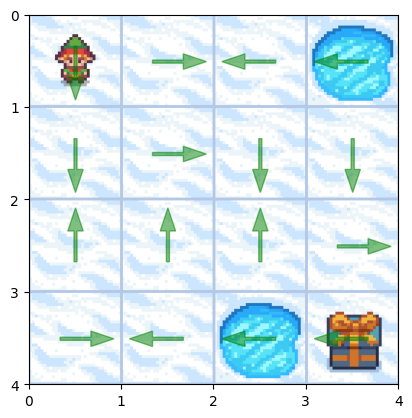

In [25]:
visualize_lake(pi_lake_small.policy, P_lake_small, lake_small)

## large

In [26]:
pi_lake_large = PolicyIteration(P_lake_large, R_lake_large, gamma=0.9, max_iter=100)
history_lake = pi_lake_large.run()
mean_r_lake_large = eval_policy_lake(lake_large, pi_lake_large.policy, 
                                     episode=1000, max_step=1000, verbose=True)
mean_r_lake_large

Finish with 93 steps: reward=0.0
Finish with 12 steps: reward=0.0
Finish with 9 steps: reward=0.0
Finish with 95 steps: reward=1.0
Finish with 289 steps: reward=1.0
Finish with 10 steps: reward=0.0
Finish with 9 steps: reward=0.0
Finish with 95 steps: reward=0.0
Finish with 138 steps: reward=1.0
Finish with 89 steps: reward=0.0
Finish with 208 steps: reward=1.0
Finish with 189 steps: reward=1.0
Finish with 156 steps: reward=1.0
Finish with 116 steps: reward=1.0
Finish with 159 steps: reward=1.0
Finish with 5 steps: reward=0.0
Finish with 186 steps: reward=1.0
Finish with 149 steps: reward=1.0
Finish with 133 steps: reward=0.0
Finish with 129 steps: reward=0.0
Finish with 210 steps: reward=1.0
Finish with 141 steps: reward=1.0
Finish with 89 steps: reward=1.0
Finish with 172 steps: reward=1.0
Finish with 6 steps: reward=0.0
Finish with 240 steps: reward=1.0
Finish with 10 steps: reward=0.0
Finish with 9 steps: reward=0.0
Finish with 145 steps: reward=1.0
Finish with 130 steps: reward=1.

0.546

### tune hyper

best params are {'gamma': 0.9999, 'max_iter': 10}


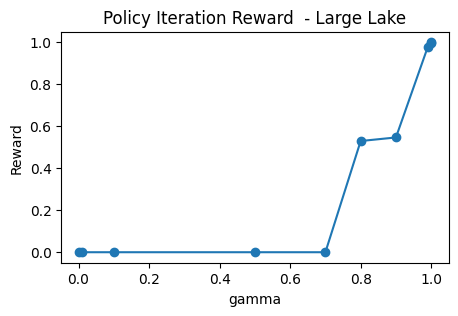

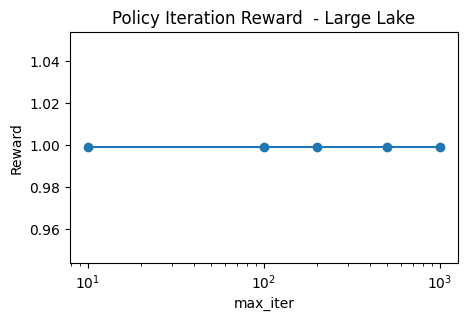

CPU times: user 23min 49s, sys: 2min 9s, total: 25min 58s
Wall time: 5min 46s


In [27]:
%%time
param_grid = {
    'gamma': [0.001, 0.01, 0.1, 0.5, 0.7, 0.8, 0.9, 0.99, 0.999, 0.9999],
    'max_iter': [10, 100, 200, 500, 1000]
}
problem = 'lake'
best_params_lake_large, result_lake_large = tune_hyper(param_grid, PolicyIteration, 
                        P_lake_large, R_lake_large, env=lake_large, problem=problem, 
                         episode=1000, max_step=1000, verbose=False)
print(f'best params are {best_params_lake_large}')
model_type = 'Policy Iteration'
data_name = 'Large Lake'
hyper = 'gamma'
plot_hyper_curve(hyper, params=best_params_lake_large, result=result_lake_large, model_type=model_type, data_name=data_name)
hyper = 'max_iter'
plot_hyper_curve(hyper, params=best_params_lake_large, result=result_lake_large, 
                 model_type=model_type, data_name=data_name, log_x=True)

In [28]:
result_lake_large

,gamma,max_iter,reward,policy,iteration
0,0.0010,10,0.000,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 2, ...",10
1,0.0010,100,0.429,"(0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, ...",20
2,0.0010,200,0.429,"(0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, ...",20
3,0.0010,500,0.429,"(0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, ...",20
4,0.0010,1000,0.429,"(0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, ...",20
5,0.0100,10,0.000,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 2, ...",10
6,0.0100,100,0.429,"(0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, ...",20
7,0.0100,200,0.429,"(0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, ...",20
8,0.0100,500,0.429,"(0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, ...",20
9,0.0100,1000,0.429,"(0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, ...",20


### convergence plot

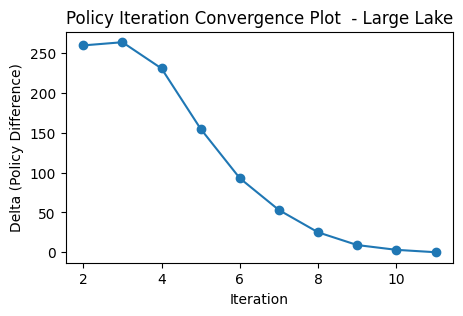

[(1,
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0,

In [29]:
pi_lake_large = PolicyIteration(P_lake_large, R_lake_large, **best_params_lake_large)
t_start = time.time()
history_lake_large = pi_lake_large.run()
t_pi_lake_large = time.time() - t_start
convergence_plot('Policy Iteration', 'Large Lake', alg=pi_lake_large)
pi_lake_large.p_cumulative

### reward

In [30]:
eval_policy_lake(lake_large, pi_lake_large.policy, episode=1000, max_step=1000, verbose=False)

0.999

### visualization

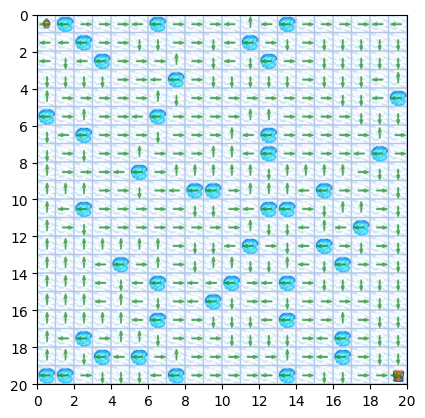

In [31]:
visualize_lake(pi_lake_large.policy, P_lake_large, lake_large)

## comparison

In [32]:
with open('./pi_lake_result.p', 'wb') as f:
    pickle.dump((pi_lake_small.iter, pi_lake_large.iter, t_pi_lake_small, t_pi_lake_large),
               f)
with open('./policy_pi_lake_small.p', 'wb') as f:
    pickle.dump(pi_lake_small.policy, f)
with open('./policy_pi_lake_large.p', 'wb') as f:
    pickle.dump(pi_lake_large.policy, f)

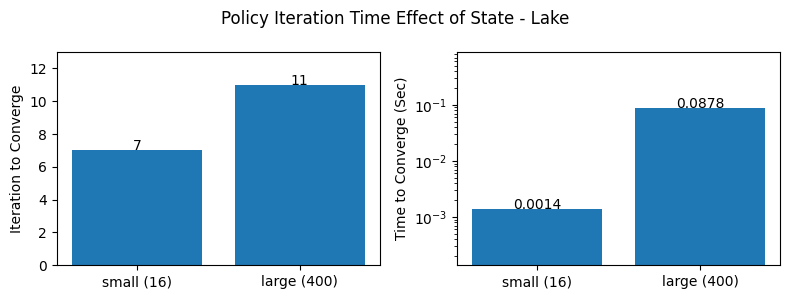

In [33]:
time_effect_plot(pi_lake_small, pi_lake_large, t_pi_lake_small, t_pi_lake_large, 
                 'Lake', 'Policy Iteration')